<a href="https://colab.research.google.com/github/lyeslehara1996/Colab/blob/main/travail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import modules**

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
import nltk 
import warnings 
%matplotlib inline

warnings.filterwarnings('ignore')

**Import** **dataset**

In [63]:
df = pd.read_excel('/content/SemEval2017.xlsx')
df.head()

,id,polariy,Comments,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,619971047195044992,negative,If these runway renovations at the airport pre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,619974445185302016,neutral,If you could ask an onstage interview question...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.drop("polariy", axis=1, inplace=True)

In [65]:
df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop("Unnamed: 7", axis=1, inplace=True)
df.drop("Unnamed: 8", axis=1, inplace=True)
df.drop("Unnamed: 9", axis=1, inplace=True)
df.drop("Unnamed: 10", axis=1, inplace=True)
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)
df.drop("Unnamed: 13", axis=1, inplace=True)
df.drop("Unnamed: 14", axis=1, inplace=True)
df.drop("Unnamed: 15", axis=1, inplace=True)

In [66]:
df.head()


,id,Comments
0,619950566786113024,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,Order Go Set a Watchman in store or through ou...
2,619971047195044992,If these runway renovations at the airport pre...
3,619974445185302016,If you could ask an onstage interview question...
4,619987808317406976,A portion of book sales from our Harper Lee/Go...


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20633 entries, 0 to 20632
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        20633 non-null  object
 1   Comments  20632 non-null  object
dtypes: object(2)
memory usage: 322.5+ KB


**Pre_processing** **dataset**

In [68]:
df['colone']= df['Comments'].str.lower()
df.head()

,id,Comments,colone
0,619950566786113024,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...","picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,Order Go Set a Watchman in store or through ou...,order go set a watchman in store or through ou...
2,619971047195044992,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...
3,619974445185302016,If you could ask an onstage interview question...,if you could ask an onstage interview question...
4,619987808317406976,A portion of book sales from our Harper Lee/Go...,a portion of book sales from our harper lee/go...


In [69]:
df['colone']= df['colone'].str.replace("[^a-z]", " ")
df.head()


,id,Comments,colone
0,619950566786113024,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",picturehouse s pink floyd s roger waters t...
1,619969366986235008,Order Go Set a Watchman in store or through ou...,order go set a watchman in store or through ou...
2,619971047195044992,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...
3,619974445185302016,If you could ask an onstage interview question...,if you could ask an onstage interview question...
4,619987808317406976,A portion of book sales from our Harper Lee/Go...,a portion of book sales from our harper lee go...


In [74]:
df['colone']= df['colone'].apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>3 ))
df.head()

,id,Comments,colone
0,619950566786113024,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",picturehous pink floyd roger water walll open ...
1,619969366986235008,Order Go Set a Watchman in store or through ou...,order watchman store through websit befor tues...
2,619971047195044992,If these runway renovations at the airport pre...,these runway renov airport prevent from taylor...
3,619974445185302016,If you could ask an onstage interview question...,could onstag interview question miss tomorrow ...
4,619987808317406976,A portion of book sales from our Harper Lee/Go...,portion book sale from harper watchman releas ...


**`Stremming and tokenization `**

In [75]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenize=df['colone'].apply(lambda x: str(x).split())
tokenize.head()
tokenize=tokenize.apply(lambda sentence: [stemmer.stem(word) for word in sentence ])


In [76]:
tokenize.head()

0    [pictureh, pink, floyd, roger, water, walll, o...
1    [order, watchman, store, through, websit, befo...
2    [these, runway, renov, airport, prevent, from,...
3    [could, onstag, interview, question, miss, tom...
4    [portion, book, sale, from, harper, watchman, ...
Name: colone, dtype: object

In [77]:
for i in range(len(tokenize)):
  tokenize[i]=" ".join(tokenize[i])
df['colone']= tokenize
df.head()

,id,Comments,colone
0,619950566786113024,"Picturehouse's, Pink Floyd's, 'Roger Waters: T...",pictureh pink floyd roger water walll open sep...
1,619969366986235008,Order Go Set a Watchman in store or through ou...,order watchman store through websit befor tues...
2,619971047195044992,If these runway renovations at the airport pre...,these runway renov airport prevent from taylor...
3,619974445185302016,If you could ask an onstage interview question...,could onstag interview question miss tomorrow ...
4,619987808317406976,A portion of book sales from our Harper Lee/Go...,portion book sale from harper watchman relea p...


In [80]:
pip install wordcloud 

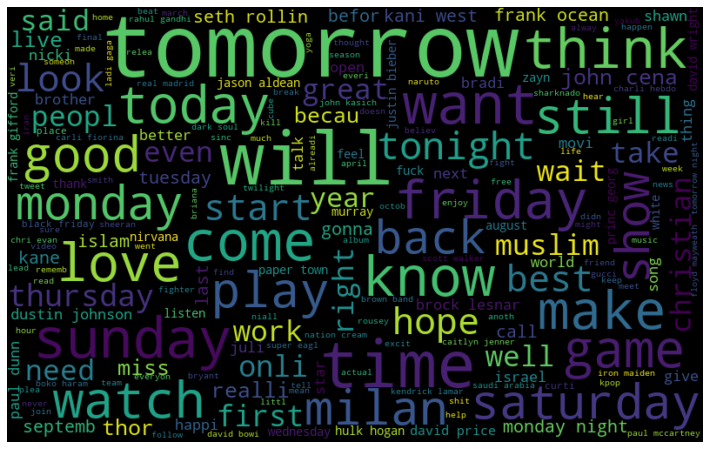

In [87]:
all_word= " ".join([sentence for sentence in df['colone']])
from wordcloud import WordCloud 
wordcloud =WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)

#pilote the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()